In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


In [ ]:
df = pd.read_csv('/content/sales_data_sample.csv', encoding = 'latin1')

In [ ]:
# drop address line 2 column
df.drop(columns = 'ADDRESSLINE2', inplace =True)

In [ ]:
# add new series for profit
df['profit'] = df['QUANTITYORDERED'] * df['PRICEEACH']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  CITY              2823 non-null   object 


In [ ]:
# check for duplicates
df.duplicated().sum()

0

In [ ]:
#sales per DEAL SIZE
sales_per_deal_size = df.groupby('DEALSIZE').sum()
sales_per_deal_size.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,profit
DEALSIZE,,,,,,,,,,
Large,1612557,7414,15668.53,843,1302119.26,412,1063,314614,24835,738757.91
Medium,14197054,52519,131980.65,8886,6087432.24,3765,9833,2773268,160335,4961736.68
Small,13150770,39134,88518.89,8525,2643077.35,3495,9126,2568888,99150,2590392.20


In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,profit
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,2871.00
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,2765.90
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,3884.34
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,3746.70
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,4900.00


In [ ]:
#Sales per month
df_monthly_sales = df.groupby('MONTH_ID').sum().sort_values(by = ['profit'], ascending =True)
df_monthly_sales.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,YEAR_ID,MSRP,profit
MONTH_ID,,,,,,,,,
6,1337996,4620,10873.51,763,454756.78,262,262478,13001,384743.59
7,1441499,4899,12105.77,905,514875.97,423,282514,14686,420973.34
9,1749237,5681,14277.88,1026,584724.27,513,342608,17245,474900.12
12,1853350,6293,14985.58,1149,634679.12,720,360650,17970,523173.14
8,1955772,6538,15974.11,1426,659310.57,573,382706,19256,552132.91


In [ ]:
#sales by quarter
df.groupby('QTR_ID').sum().sort_values(by= ['profit'], ascending = False)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,profit
QTR_ID,,,,,,,,,
4,11225699,38148,91589.23,7314,3874780.01,11897,2191852,110452,3186892.29
1,6829804,23485,55446.88,4300,2350817.73,1313,1332832,66644,1954097.17
2,5758370,20316,46774.20,3283,2048120.30,2758,1124258,56037,1701890.96
3,5146508,17118,42357.76,3357,1758910.81,4054,1007828,51187,1448006.37


In [ ]:
# top 10 customers by profit
df_top_customers = df.groupby('CONTACTFIRSTNAME').sum().sort_values( by = ['profit'], ascending = False)
df_top_customers.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,profit
CONTACTFIRSTNAME,,,,,,,,,,
Valarie,2637479,9263,21344.55,1879,944892.37,654,1705,514996,26216,766852.68
Diego,2666218,9327,21195.40,1664,912294.11,590,1583,519065,25127,766195.05
Julie,1198211,4102,9731.09,717,430815.43,322,832,234434,12074,344334.59
Sue,862252,3099,6726.95,486,292979.86,197,502,168333,7880,248726.43
Michael,861678,2766,7145.74,573,288797.20,215,550,168328,8630,235651.64
Juri,615448,2112,5125.40,396,203992.95,170,429,120229,5837,180036.75
Maria,594444,2079,5002.99,358,212054.53,184,489,116213,5902,180011.71
Elizabeth,565763,1919,4711.32,354,192643.12,136,340,110223,5440,164742.92
Peter,563321,1926,4714.48,387,200995.41,141,353,110203,5694,164575.87


In [ ]:
# sales per country
df.country_sales = df.groupby('COUNTRY').sum().sort_values(by = ['profit'], ascending =False)
df.country_sales.head(10)

<ipython-input-12-2f741a21d38f>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.country_sales = df.groupby('COUNTRY').sum().sort_values(by = ['profit'], ascending =False)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,profit
COUNTRY,,,,,,,,,,
USA,10297362,35659,84159.65,6369,3627982.83,2814,7380,2011812,101539,2986425.21
Spain,3513645,12429,28042.54,2186,1215686.92,859,2299,685341,33201,1021705.97
France,3223513,11090,25920.87,2028,1110916.52,776,1960,629233,31330,919257.85
Australia,1898841,6246,15449.14,1181,630623.10,511,1345,370706,18493,521598.46
UK,1476792,5013,11882.70,1027,478880.46,431,1166,288533,13876,413203.34
Italy,1158239,3773,9329.40,890,374674.31,329,868,226422,11119,309402.87
Finland,944808,3192,7722.15,587,329581.91,202,485,184374,9360,268714.70
Norway,869325,2842,7318.18,559,307463.70,275,710,170287,8956,246115.80
Singapore,806424,2760,6581.90,544,288488.41,212,564,158278,8378,227985.50


In [ ]:
#top 5 product line
top_productline = df.groupby('PRODUCTLINE').sum().sort_values(by =['profit'], ascending =False)
top_productline.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,profit
PRODUCTLINE,,,,,,,,,,
Classic Cars,9918937,33992,84453.70,6233,3919615.66,2684,7003,1937661,115929,2968546.40
Vintage Cars,6225979,21069,47435.96,3834,1903150.84,1639,4282,1216309,52482,1644212.05
Motorcycles,3395505,11663,27472.19,1963,1166388.34,884,2275,663273,32130,971086.29
Trucks and Buses,3087894,10777,26345.91,1873,1127789.84,837,2210,603143,30842,947355.18
Planes,3142556,10727,25012.72,2210,975003.57,800,2081,613199,27163,877942.21


In [ ]:
#Sales per year
df_year = df.groupby('YEAR_ID').sum().sort_values(by =['profit'], ascending = False)
df_year.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,MSRP,profit
YEAR_ID,,,,,,,,,
2004,13834764,46824,112488.10,8690,4724162.60,3916,10344,134851,3913700.87
2003,10158099,34612,83793.14,6709,3516979.54,3102,8243,101589,2898149.94
2005,4967518,17631,39886.83,2855,1791486.71,654,1435,47880,1479035.98


In [ ]:
#how many products where cancelled?
mask = df['STATUS']== 'Cancelled'
df[mask].groupby('STATUS').sum()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,profit
STATUS,,,,,,,,,,
Cancelled,613878,2038,5061.69,482,194487.48,152,410,120224,5759,171195.49


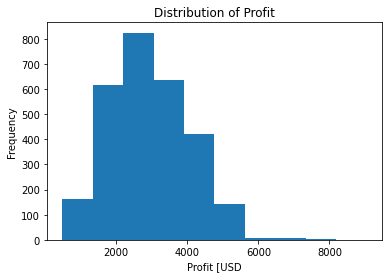

In [ ]:
plt.hist(df["profit"])
plt.xlabel("Profit [USD")
plt.ylabel("Frequency")
plt.title ("Distribution of Profit");

In [ ]:
df.country_sales = df.COUNTRY.value_counts().head(10)
df.country_sales

USA          1004
Spain         342
France        314
Australia     185
UK            144
Italy         113
Finland        92
Norway         85
Singapore      79
Canada         70
Name: COUNTRY, dtype: int64

# Top 10 Country with Most Sales 

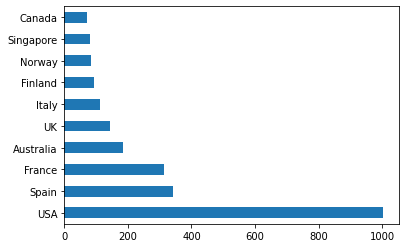

In [ ]:
df.country_sales.plot(kind ='barh')

In [ ]:
product_line = df.PRODUCTLINE.value_counts()
product_line

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

# Top Product Line

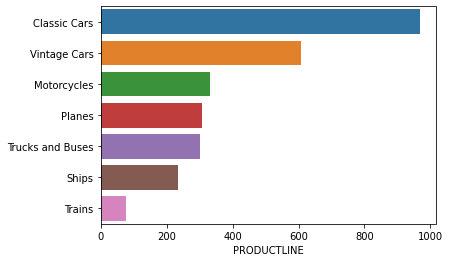

In [ ]:
sns.barplot(product_line, product_line.index);